In [315]:
# SOURCE: https://data-flair.training/blogs/python-mini-project-speech-emotion-recognition/

# Libraries

import librosa
import soundfile
import os, glob, pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


In [358]:

#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
    if mel:
        mel_spec = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
        result = np.hstack((result, mel_spec))

    return result


#DataFlair - Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#DataFlair - Emotions to observe
observed_emotions=['calm', 'disgust', 'surprised', 'happy', 'angry']

def pad_features(feature, target_length):
    if len(feature) < target_length:
        return np.pad(feature, (0, target_length - len(feature)), 'constant')
    return feature

#DataFlair - Load the data and extract features for each sound file

def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("audio-files/ravdess/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [359]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.20)

#DataFlair - Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

#DataFlair - Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

#DataFlair - Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

#DataFlair - Train the model
model.fit(x_train,y_train)

#DataFlair - Predict for the test set
y_pred=model.predict(x_test)

#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

(496, 124)
Features extracted: 180
Accuracy: 73.39%


/Users/fmunting/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [360]:
'''#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

#DataFlair - Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

#DataFlair - Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

alphas = [0.1, 0.05, 0.01, 0.001]
hidden_layer_size = [(300,), (300, 100), (300, 300)]
max_iter = [250, 500, 1000, 1500]


for i in alphas:
    for j in hidden_layer_size:
        for iter in max_iter:
#DataFlair - Initialize the Multi Layer Perceptron Classifier
            model=MLPClassifier(alpha=i, batch_size=256, epsilon=1e-08, hidden_layer_sizes=j, learning_rate='adaptive', max_iter=iter)

#DataFlair - Train the model
            model.fit(x_train,y_train)

#DataFlair - Predict for the test set
            y_pred=model.predict(x_test)

#DataFlair - Calculate the accuracy of our model
            accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#DataFlair - Print the accuracy
            print(f"Alpha: {i}, Hidden Layer Size: {j}, Max Iter: {iter}, Accuracy: {accuracy*100:.2f}%")

'''

(465, 155)
Features extracted: 180


/Users/fmunting/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha: 0.1, Hidden Layer Size: (300,), Max Iter: 250, Accuracy: 66.45%


/Users/fmunting/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha: 0.1, Hidden Layer Size: (300,), Max Iter: 500, Accuracy: 74.19%
Alpha: 0.1, Hidden Layer Size: (300,), Max Iter: 1000, Accuracy: 71.61%
Alpha: 0.1, Hidden Layer Size: (300,), Max Iter: 1500, Accuracy: 70.32%


/Users/fmunting/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha: 0.1, Hidden Layer Size: (300, 100), Max Iter: 250, Accuracy: 68.39%


/Users/fmunting/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha: 0.1, Hidden Layer Size: (300, 100), Max Iter: 500, Accuracy: 70.97%
Alpha: 0.1, Hidden Layer Size: (300, 100), Max Iter: 1000, Accuracy: 60.65%
Alpha: 0.1, Hidden Layer Size: (300, 100), Max Iter: 1500, Accuracy: 73.55%
Alpha: 0.1, Hidden Layer Size: (300, 300), Max Iter: 250, Accuracy: 53.55%
Alpha: 0.1, Hidden Layer Size: (300, 300), Max Iter: 500, Accuracy: 52.26%
Alpha: 0.1, Hidden Layer Size: (300, 300), Max Iter: 1000, Accuracy: 43.23%
Alpha: 0.1, Hidden Layer Size: (300, 300), Max Iter: 1500, Accuracy: 66.45%


/Users/fmunting/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha: 0.05, Hidden Layer Size: (300,), Max Iter: 250, Accuracy: 67.74%


/Users/fmunting/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha: 0.05, Hidden Layer Size: (300,), Max Iter: 500, Accuracy: 70.32%
Alpha: 0.05, Hidden Layer Size: (300,), Max Iter: 1000, Accuracy: 70.32%
Alpha: 0.05, Hidden Layer Size: (300,), Max Iter: 1500, Accuracy: 72.26%


/Users/fmunting/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha: 0.05, Hidden Layer Size: (300, 100), Max Iter: 250, Accuracy: 70.32%
Alpha: 0.05, Hidden Layer Size: (300, 100), Max Iter: 500, Accuracy: 69.68%
Alpha: 0.05, Hidden Layer Size: (300, 100), Max Iter: 1000, Accuracy: 69.68%
Alpha: 0.05, Hidden Layer Size: (300, 100), Max Iter: 1500, Accuracy: 67.74%


/Users/fmunting/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha: 0.05, Hidden Layer Size: (300, 300), Max Iter: 250, Accuracy: 70.97%
Alpha: 0.05, Hidden Layer Size: (300, 300), Max Iter: 500, Accuracy: 49.68%
Alpha: 0.05, Hidden Layer Size: (300, 300), Max Iter: 1000, Accuracy: 54.84%
Alpha: 0.05, Hidden Layer Size: (300, 300), Max Iter: 1500, Accuracy: 60.65%


/Users/fmunting/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha: 0.01, Hidden Layer Size: (300,), Max Iter: 250, Accuracy: 69.68%


/Users/fmunting/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha: 0.01, Hidden Layer Size: (300,), Max Iter: 500, Accuracy: 72.26%
Alpha: 0.01, Hidden Layer Size: (300,), Max Iter: 1000, Accuracy: 70.32%
Alpha: 0.01, Hidden Layer Size: (300,), Max Iter: 1500, Accuracy: 63.87%
Alpha: 0.01, Hidden Layer Size: (300, 100), Max Iter: 250, Accuracy: 61.94%
Alpha: 0.01, Hidden Layer Size: (300, 100), Max Iter: 500, Accuracy: 64.52%
Alpha: 0.01, Hidden Layer Size: (300, 100), Max Iter: 1000, Accuracy: 67.74%
Alpha: 0.01, Hidden Layer Size: (300, 100), Max Iter: 1500, Accuracy: 60.00%
Alpha: 0.01, Hidden Layer Size: (300, 300), Max Iter: 250, Accuracy: 51.61%
Alpha: 0.01, Hidden Layer Size: (300, 300), Max Iter: 500, Accuracy: 67.74%
Alpha: 0.01, Hidden Layer Size: (300, 300), Max Iter: 1000, Accuracy: 42.58%
Alpha: 0.01, Hidden Layer Size: (300, 300), Max Iter: 1500, Accuracy: 65.16%


/Users/fmunting/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha: 0.001, Hidden Layer Size: (300,), Max Iter: 250, Accuracy: 72.26%


/Users/fmunting/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha: 0.001, Hidden Layer Size: (300,), Max Iter: 500, Accuracy: 73.55%
Alpha: 0.001, Hidden Layer Size: (300,), Max Iter: 1000, Accuracy: 68.39%
Alpha: 0.001, Hidden Layer Size: (300,), Max Iter: 1500, Accuracy: 68.39%
Alpha: 0.001, Hidden Layer Size: (300, 100), Max Iter: 250, Accuracy: 56.77%
Alpha: 0.001, Hidden Layer Size: (300, 100), Max Iter: 500, Accuracy: 71.61%
Alpha: 0.001, Hidden Layer Size: (300, 100), Max Iter: 1000, Accuracy: 73.55%
Alpha: 0.001, Hidden Layer Size: (300, 100), Max Iter: 1500, Accuracy: 68.39%
Alpha: 0.001, Hidden Layer Size: (300, 300), Max Iter: 250, Accuracy: 57.42%
Alpha: 0.001, Hidden Layer Size: (300, 300), Max Iter: 500, Accuracy: 69.68%
Alpha: 0.001, Hidden Layer Size: (300, 300), Max Iter: 1000, Accuracy: 56.13%
Alpha: 0.001, Hidden Layer Size: (300, 300), Max Iter: 1500, Accuracy: 58.71%


In [361]:
speech_list = []
speech_names = []

for file in glob.glob("audio-files/*.wav"):
    file_name=os.path.basename(file)
    speech_names.append(file_name)
    feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
    speech_list.append(feature)

/Users/fmunting/opt/anaconda3/lib/python3.9/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [365]:
model.predict(speech_list)

array(['angry', 'angry', 'angry', 'angry', 'angry', 'happy', 'happy',
       'angry', 'surprised', 'angry', 'angry', 'surprised', 'disgust',
       'calm', 'happy', 'happy', 'disgust', 'happy', 'disgust', 'happy',
       'happy', 'happy', 'calm', 'angry', 'happy', 'surprised',
       'surprised', 'angry', 'angry', 'disgust', 'surprised', 'angry',
       'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry',
       'angry', 'happy', 'happy', 'angry', 'angry', 'surprised', 'happy',
       'disgust', 'angry', 'happy', 'happy', 'happy', 'calm', 'happy',
       'happy', 'surprised', 'disgust', 'happy', 'angry', 'surprised',
       'disgust', 'happy', 'angry', 'angry', 'angry', 'angry', 'angry',
       'angry', 'angry', 'angry', 'angry', 'angry', 'surprised', 'happy',
       'surprised', 'surprised', 'happy', 'angry', 'happy', 'happy',
       'happy', 'happy', 'happy', 'happy', 'surprised', 'happy',
       'surprised', 'angry', 'angry', 'disgust', 'angry', 'angry',
       'angry', 'a

In [366]:

def final_load_data():
    x,y=[],[]
    for file in glob.glob("audio-files/ravdess/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return x, y


In [368]:
#DataFlair - Split the dataset
x, y =final_load_data()

#DataFlair - Initialize the Multi Layer Perceptron Classifier
final_model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,100), learning_rate='adaptive', max_iter=1500)

#DataFlair - Train the model
model.fit(x,y)

speech_predictions = final_model.predict(speech_list)

NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
len(speech_predictions)

502

In [ ]:
df = pd.read_csv("data-files/transcripts_w_lies.csv")

In [ ]:
pred_df = pd.DataFrame({"names": speech_names, "emotion": speech_predictions})

In [ ]:
pred_df.head()

,names,emotion
0,Donald Trump speaks at the RNC： FULL SPEECH_ch...,angry
1,Donald Trump speaks at the RNC： FULL SPEECH_ch...,angry
2,Donald Trump speaks at the RNC： FULL SPEECH_ch...,angry
3,Donald Trump speaks at the RNC： FULL SPEECH_ch...,angry
4,Donald Trump speaks at the RNC： FULL SPEECH_ch...,angry


In [ ]:
df["names"] = df["Chunk Filename"].str.replace("/Users/milanvaghani/Desktop/Unstructed Machine Learning/", "")

In [ ]:
df_ordered = df.sort_values(by = "names")
pred_df_ordered = pred_df.sort_values(by = "names")
emotion_ordered = pred_df_ordered["emotion"]
df_ordered["emotion"] = emotion_ordered

In [ ]:
final_df = df_ordered.drop(columns = ["Unnamed: 0", "YouTube URL", "Chunk Filename"])

In [ ]:
speech_number = []

for line in final_df["names"]:
    if line.startswith("Audio Files/Donald Trump speaks"):
        speech_number.append(3)
    elif line.startswith("VP Kamala Harris full speech"):
        speech_number.append(1)
    elif line.startswith("Audio Files/Donald Trump full"):
        speech_number.append(2)
    else:
        speech_number.append(4)

final_df["speech_number"] = speech_number

<Axes: xlabel='count', ylabel='Count'>

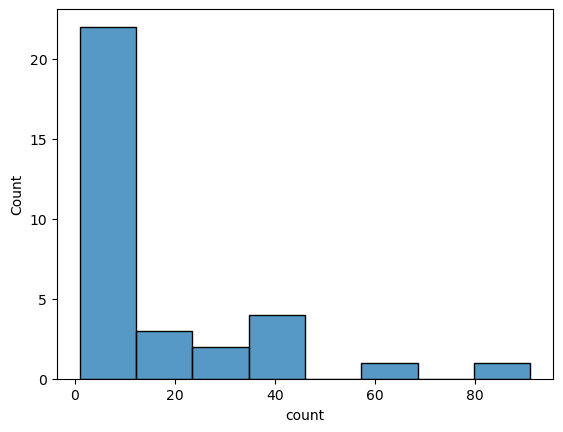

In [ ]:
import seaborn as sns

sns.histplot(final_df.groupby(["speech_number", "lie"])["emotion"].value_counts())

/var/folders/gs/rvxrkqns1ws3722g5ty7jpqw0000gn/T/ipykernel_15042/4008278264.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


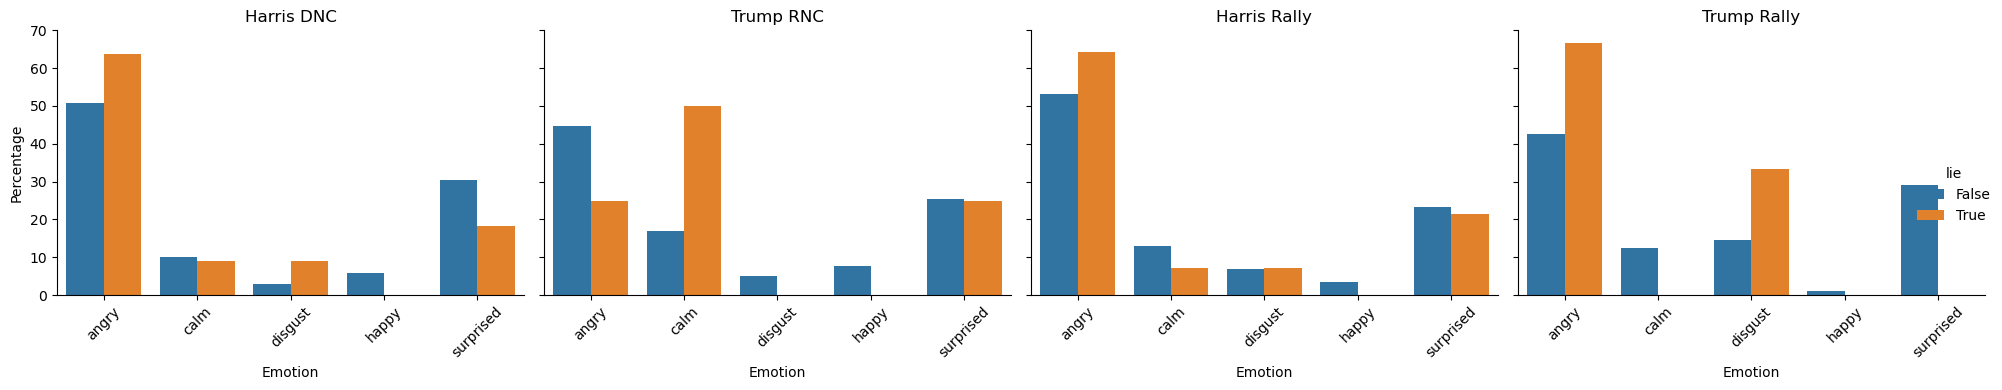

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate the percentage of emotions within each speech and lie/truth
emotion_counts = final_df.groupby(["speech_number", "lie", "emotion"]).size().reset_index(name="counts")

# Step 2: Calculate the percentage of each emotion within each speech and lie/truth
emotion_counts["percentage"] = emotion_counts.groupby(["speech_number", "lie"])["counts"].transform(lambda x: 100 * x / x.sum())

# Step 3: Plot using FacetGrid to split by speech_number
g = sns.catplot(
    data=emotion_counts,
    x="emotion", y="percentage", hue="lie", col="speech_number",
    kind="bar", ci=None, height=4, aspect=1.2
)

# Manually set titles for each subplot
custom_titles = ["Harris DNC", "Trump RNC", "Harris Rally", "Trump Rally"]
for ax, title in zip(g.axes.flat, custom_titles):
    ax.set_title(title)
g.set_axis_labels("Emotion", "Percentage")
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df.head()

,Unnamed: 0,YouTube URL,Chunk Number,Chunk Filename,Transcript,lie,names
0,0,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,1,/Users/milanvaghani/Desktop/Unstructed Machine...,NaN,False,VP Kamala Harris full speech at 2024 DNC (Aug....
1,1,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,2,/Users/milanvaghani/Desktop/Unstructed Machine...,good evening everyone. Good evening good even...,False,VP Kamala Harris full speech at 2024 DNC (Aug....
2,2,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,3,/Users/milanvaghani/Desktop/Unstructed Machine...,thank you thank you thank you thank you thank...,False,VP Kamala Harris full speech at 2024 DNC (Aug....
3,3,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,4,/Users/milanvaghani/Desktop/Unstructed Machine...,thank you all thank you all okay we got to g...,False,VP Kamala Harris full speech at 2024 DNC (Aug....
4,4,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,5,/Users/milanvaghani/Desktop/Unstructed Machine...,thank you everyone thank you everyone thank yo...,False,VP Kamala Harris full speech at 2024 DNC (Aug....


In [ ]:
lie_truth_df = df[["Chunk Filename", "lie"]]
lie_truth_df.to_csv("truth_or_lie_input.csv")

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table of emotions vs truth/lie
contingency_table = pd.crosstab(final_df['emotion'], final_df['lie'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}, p-value: {p}")

trump_lies = final_df[final_df["speech_number"].isin([2, 3])]
kamala_lies = final_df[final_df["speech_number"].isin([1, 4])]

# Create a contingency table of emotions vs truth/lie
t_contingency_table = pd.crosstab(trump_lies['emotion'], trump_lies['lie'])

# Perform the Chi-Square test
t_chi2, t_p, t_dof, t_expected = chi2_contingency(t_contingency_table)

print(f"Trump Chi2 Statistic: {t_chi2}, p-value: {t_p}")

# Create a contingency table of emotions vs truth/lie
k_contingency_table = pd.crosstab(kamala_lies['emotion'], kamala_lies['lie'])


# Perform the Chi-Square test
k_chi2, k_p, k_dof, k_expected = chi2_contingency(k_contingency_table)
print(f"Kamala Chi2 Statistic: {k_chi2}, p-value: {k_p}")


Chi2 Statistic: 3.103907894660769, p-value: 0.5405897381104283
Trump Chi2 Statistic: 1.1947079488455794, p-value: 0.8789691486554918
Kamala Chi2 Statistic: 2.913306387164522, p-value: 0.5724366181377519


In [ ]:
final_df["emotion"].value_counts()

emotion
angry        246
surprised    129
calm          68
disgust       37
happy         22
Name: count, dtype: int64